# Logistic Regression

Is it regression or classification? Yes.

Let's start differently, with an example.

## Example: Simple Logistic Regression as a Classifier

Let's revisit the breast cancer dataset. The data comprise numerous physical features of a tumor (e.g. area, texture, symmetry, etc.) and each feature set is labeled with a binary target, benign or malignant.

**Note**: In the original data set, benign tumors are labeled 1 and malignant tumors 0. This seems backwards to me and every time I look at these data, my wrong intuition beats out my terrible memory. So, in the example below, I've swapped the labeling so that 1 and 0 correspond to malignant and benign, respectively. So:
 - 0 = benign
 - 1 = malignant

We'll first fit a simple logistic regression, predicting malignancy based on just one feature.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the breast cancer dataset
bc_df, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Adding the target to the DataFrame of features
# AND FLIPPING THE LABELS OF THE TARGET
# 1 - malignant
# 0 - benign
bc_df['y'] = 1-y

display(bc_df.describe())
display(bc_df['y'].describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: y, dtype: float64

In [3]:
# sns.pairplot(bc_df)
# plt.show()

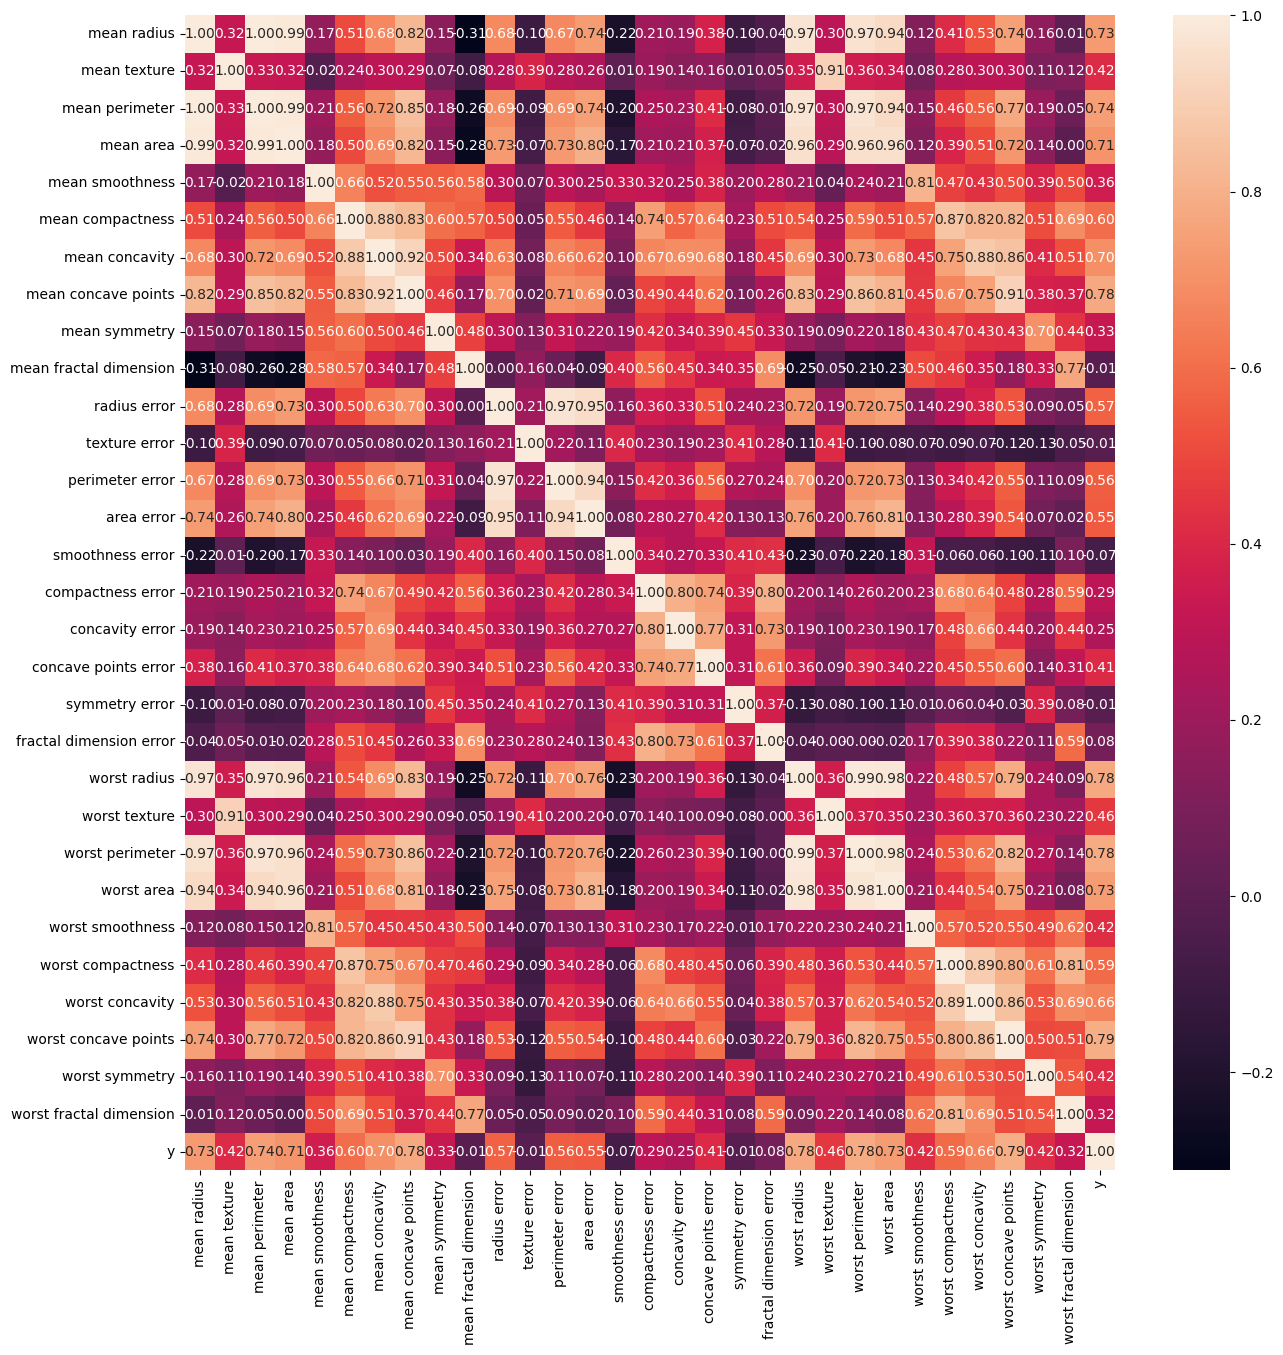

In [4]:
bc_corr = bc_df.corr()

fig, ax = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(bc_corr, annot = True, fmt = '.2f')
plt.show()

In [5]:
bc_corr = bc_df.corr()
bc_corr[['y']].sort_values(by = 'y', ascending = False)

,y
y,1.000000
worst concave points,0.793566
worst perimeter,0.782914
mean concave points,0.776614
worst radius,0.776454
mean perimeter,0.742636
worst area,0.733825
mean radius,0.730029
mean area,0.708984
mean concavity,0.696360


In [6]:
feature = 'worst concave points'
X = bc_df[[feature]]
y = bc_df['y']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)

# Train a logistic regression model
model_LogReg = LogisticRegression(penalty = None, max_iter = 10000)
model_LogReg.fit(X_train, y_train)

# Make predictions
y_pred = model_LogReg.predict(X_test)

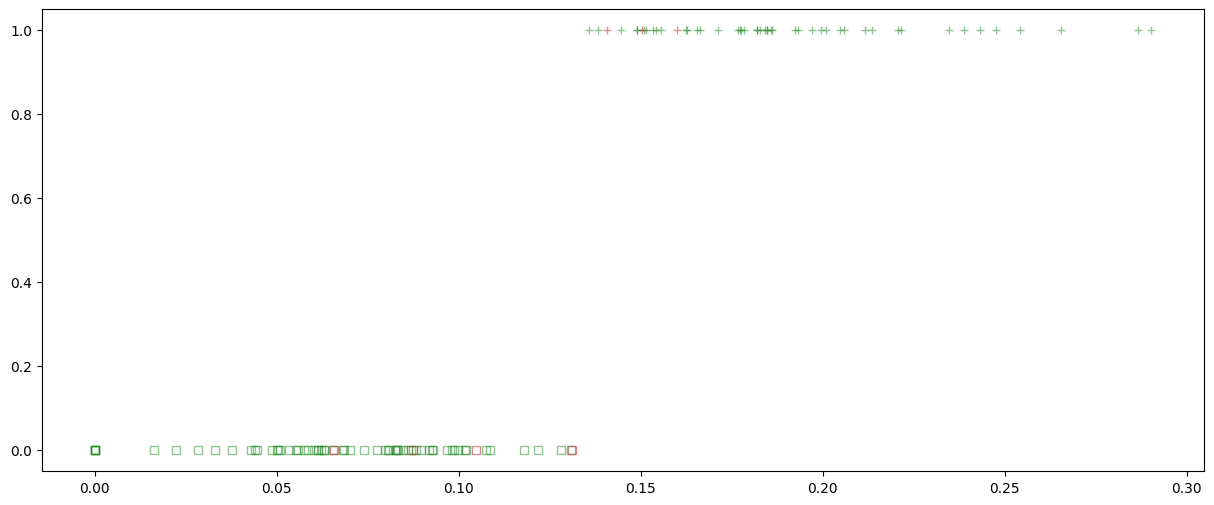

In [9]:
TP = (y_pred==1) & (y_test==1)
TN = (y_pred==0) & (y_test==0)
FP = (y_pred==1) & (y_test==0)
FN = (y_pred==0) & (y_test==1)

right = 'forestgreen'
wrong = 'firebrick'
positive = '+'
negative = 's'

fig, ax = plt.subplots(1,1, figsize = (15, 6))
ax.plot(X_test[TP], y_pred[TP], color = right, alpha = 0.5, marker = positive, linewidth = 0, label = 'True Positive')
ax.plot(X_test[TN], y_pred[TN], color = right, markerfacecolor='none',alpha = 0.5, marker = negative, linewidth = 0, label = 'True Negative')
ax.plot(X_test[FP], y_pred[FP], color = wrong, alpha = 0.5, marker = positive, linewidth = 0, label = 'False Positive')
ax.plot(X_test[FN], y_pred[FN], color = wrong, markerfacecolor='none', alpha = 0.5, marker = negative, linewidth = 0, label = 'False Negative')

plt.show()

In [10]:
y_pred_prob = model_LogReg.predict_proba(X_test)
y_pred_prob

array([[5.44077032e-01, 4.55922968e-01],
       [9.62062910e-01, 3.79370899e-02],
       [9.57331930e-01, 4.26680697e-02],
       [9.99721296e-01, 2.78704480e-04],
       [1.46279385e-01, 8.53720615e-01],
       [2.08250039e-01, 7.91749961e-01],
       [9.99721296e-01, 2.78704480e-04],
       [8.87634417e-01, 1.12365583e-01],
       [9.05480794e-01, 9.45192059e-02],
       [8.75698342e-01, 1.24301658e-01],
       [1.25467803e-01, 8.74532197e-01],
       [1.18044894e-02, 9.88195511e-01],
       [2.51504627e-01, 7.48495373e-01],
       [6.74321801e-01, 3.25678199e-01],
       [5.83207275e-01, 4.16792725e-01],
       [9.13925978e-02, 9.08607402e-01],
       [9.84872909e-01, 1.51270914e-02],
       [9.90642327e-01, 9.35767331e-03],
       [9.62771546e-01, 3.72284541e-02],
       [5.37995787e-01, 4.62004213e-01],
       [9.93737280e-01, 6.26271980e-03],
       [9.56828937e-01, 4.31710631e-02],
       [4.19100013e-02, 9.58089999e-01],
       [2.81397609e-01, 7.18602391e-01],
       [1.195453

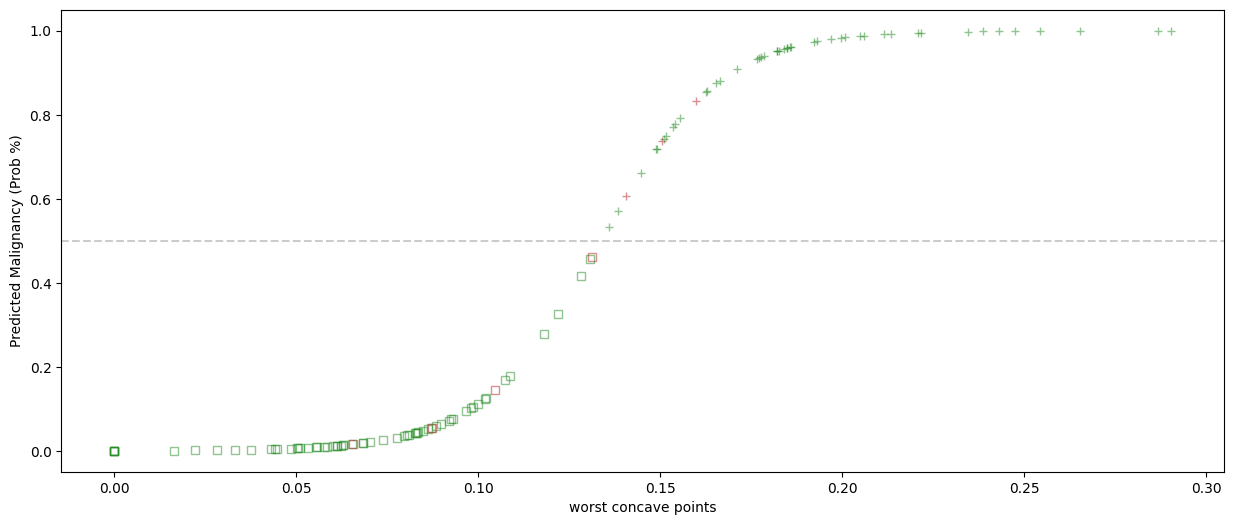

In [11]:

fig, ax = plt.subplots(1,1, figsize = (15, 6))
ax.plot(X_test[TP], y_pred_prob[TP,1], color = right, alpha = 0.5, marker = positive, linewidth = 0, label = 'True Positive')
ax.plot(X_test[TN], y_pred_prob[TN,1], color = right, markerfacecolor='none',alpha = 0.5, marker = negative, linewidth = 0, label = 'True Negative')
ax.plot(X_test[FP], y_pred_prob[FP,1], color = wrong, alpha = 0.5, marker = positive, linewidth = 0, label = 'False Positive')
ax.plot(X_test[FN], y_pred_prob[FN,1], color = wrong, markerfacecolor='none', alpha = 0.5, marker = negative, linewidth = 0, label = 'False Negative')

ax.set_xlabel(feature)
ax.set_ylabel('Predicted Malignancy (Prob %)')

plt.axhline(y = 0.5, color = 'k', linestyle = '--', alpha = 0.2)
plt.show()

What is this shape?

## The Logistic Function

The logistic function is a smooth monotonically increasing (means goes up as x goes up) curve with a range of (0, 1). It trends to 0 as x decreases and trends to 1 as x increases with a value of 0.5 at x=0.

This is the logistic function:

$$
\sigma(t) = \frac{1}{1+\exp(-t)}
$$

Let's take a look at this function.


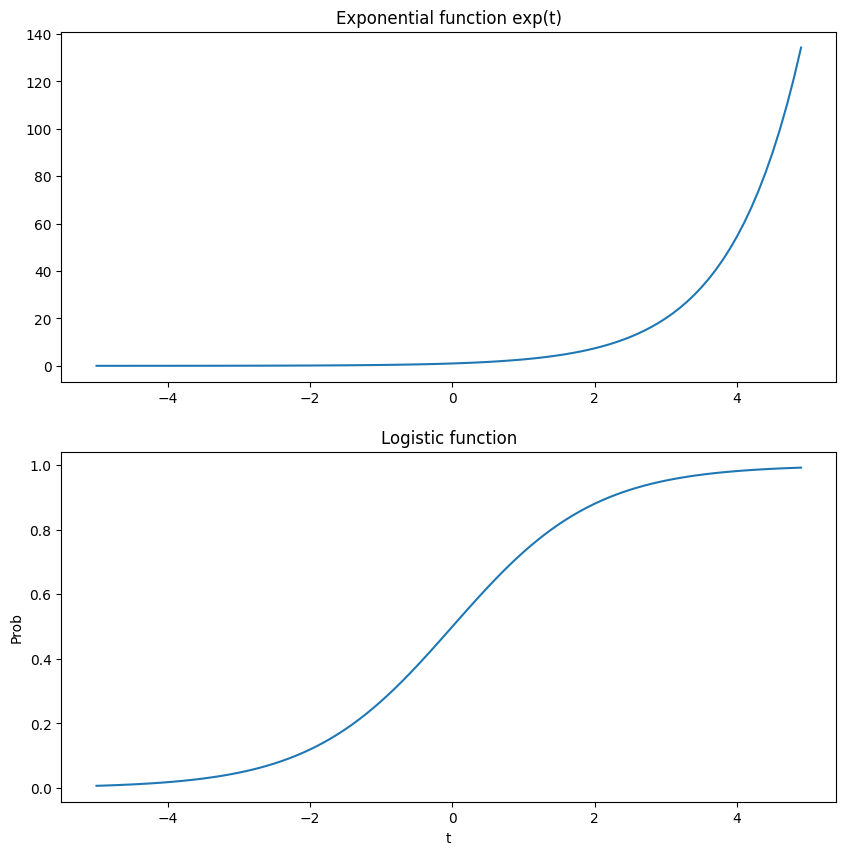

In [12]:
t = np.arange(-5, 5, 0.1)
logistic = lambda t: 1/(1 + np.exp(-t))

fig, ax = plt.subplots(2,1, figsize=(10, 10))

ax[0].plot(t, np.exp(t))
ax[0].set_title('Exponential function exp(t)')

ax[1].plot(t, logistic(t))
ax[1].set_title('Logistic function')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Prob')
plt.show()



For the plots above:

 - as t gets to be a big positive number, $\exp(-t)$ goes to 0 and $\sigma(t)$ goes to 1.
 - as t gets to be a big negative number, $\exp(-t)$ goes to $+\infty$ and $\sigma(t)$ goes to 0.


The logistic function actually furnishes a probability. When we use logistic regression for classification, we set a decision threshold for the probability, 50% by default.

We denote the predicted probability as $\hat{p}$.

 - If $\hat{p}=\sigma(t)>0.5$ then 1 is more likely than 0, so classify as 1
 - If $\hat{p}=\sigma(t)<0.5$ then 0 is more likely than 1, so classify as 0

50% is a default threshold. It's a good decision value if either case has equal consequence. 

 - Improving Precision: We can raise the threshold if we want to be more discerning about what we classify as 1. 
 - Improving Recall: Conversely, we can lower the threshold if we want to catch more instances of 1.

## Logistic and Linear Regression

Why are these two topics in the same chapter?

Let's look back at the logistic function?

$$
\sigma(t) = \frac{1}{1+\exp(-t)}
$$

What are the parameters of this model? I don't see any. That's because they're hidden inside $t$.

$$
t = \theta_0 + \theta_1 \cdot x_1 + \cdots + \theta_n \cdot x_n
$$

The value of $t$ is the output of a linear model (and it can be any flavor of regularized linear model too!). So the parameters of a logistic regression are actually the coefficients of a linear regression (or Lasso or Ridge or ElasticNet). What does this linear model do?

The linear equation maps feature vectors to the range $(-\infty, +\infty)$. Features that should be classified as 1 get assigned positive numbers, larger for more certain classifications; features that should be classified as 0 get assigned negative numbers, larger negative for more certain classifications.

### Cost Function

The *loss function* minimized for any prediction is:

$$
c(\Theta) = 
\begin{cases}
    -\log(\hat{p}) & \text{if $y=1$}.\\
    -\log(1-\hat{p}) & \text{if $y=0$}.
\end{cases}
$$

The *cost function* minimized for logistic regression is the *log-loss* function.

$$
J_{\text{LogLoss}}(\Theta) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{p}_i) + (1 - y_i) \log(1 - \hat{p}_i) \right]
$$



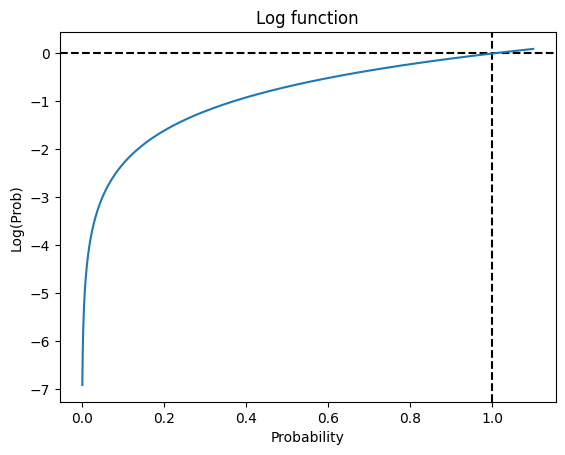

In [13]:
t = np.arange(0.001,1.1, 0.001)
y = np.log(t)

plt.title('Log function')
plt.axvline(x=1, color = 'k', linestyle = '--')
plt.axhline(y=0, color = 'k', linestyle = '--')
plt.xlabel(f'Probability')
plt.ylabel(f'Log(Prob)')

plt.plot(t, y)

plt.show()

## Back to the Example

Now, let's use all of our features.



In [14]:
from sklearn.preprocessing import StandardScaler

X = bc_df.drop('y', axis = 1)
y = bc_df['y']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data, since we are using multiple features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

# Train a logistic regression model
model_LogReg = LogisticRegression(penalty = None, max_iter = 10000)
model_LogReg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model_LogReg.predict(X_train_scaled)
y_pred = model_LogReg.predict(X_test_scaled)

y_pred_prob = model_LogReg.predict_proba(X_test_scaled)



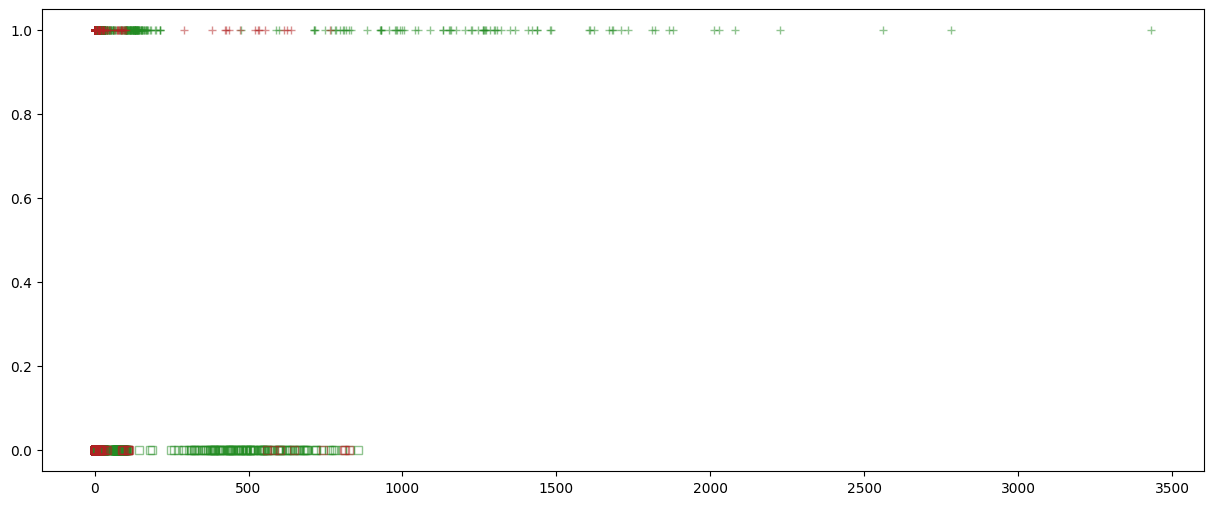

In [15]:
TP = (y_pred==1) & (y_test==1)
TN = (y_pred==0) & (y_test==0)
FP = (y_pred==1) & (y_test==0)
FN = (y_pred==0) & (y_test==1)

fig, ax = plt.subplots(1,1, figsize = (15, 6))
ax.plot(X_test[TP], y_pred[TP], color = right, alpha = 0.5, marker = positive, linewidth = 0, label = 'True Positive')
ax.plot(X_test[TN], y_pred[TN], color = right, markerfacecolor='none',alpha = 0.5, marker = negative, linewidth = 0, label = 'True Negative')
ax.plot(X_test[FP], y_pred[FP], color = wrong, alpha = 0.5, marker = positive, linewidth = 0, label = 'False Positive')
ax.plot(X_test[FN], y_pred[FN], color = wrong, markerfacecolor='none', alpha = 0.5, marker = negative, linewidth = 0, label = 'False Negative')

plt.show()

### Assessing the model

How'd we do?

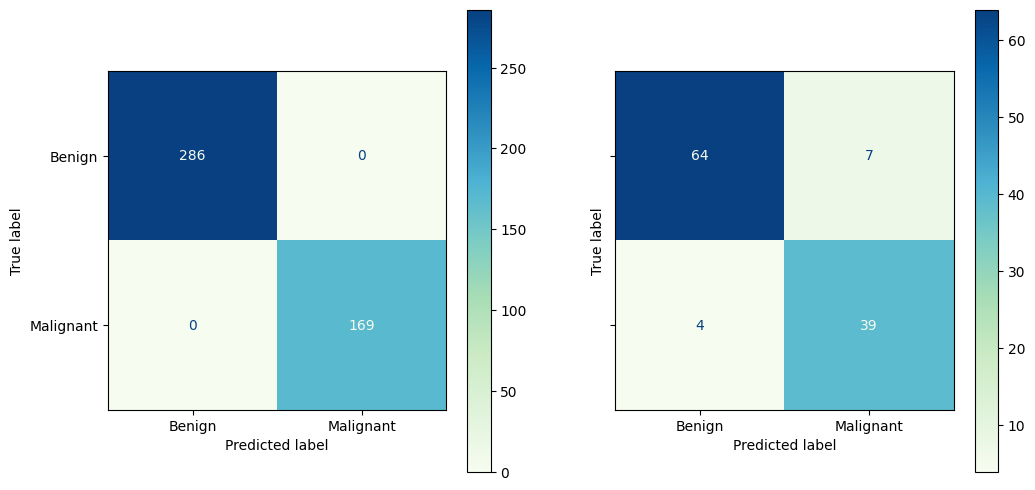

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, 
                                        # normalize = 'true',
                                        display_labels = ['Benign', 'Malignant'],
                                        cmap = 'GnBu',
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        # normalize = 'true',
                                        display_labels = ['Benign', 'Malignant'],
                                        cmap = 'GnBu',
                                        ax = ax[1])
plt.show()

## Regularization in Logistic Regression

Take a look at the documentation for [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

The four hyper-parameters you will likely use:

 - **penalty**
    - 'l1' - use Lasso
    - 'l2' - use Ridge (Default)
    - 'elasticnet' - use ElasticNet
    - None - use unregularized linear regression
 - **C** - is the regularization parameter BUT C = 1/alpha. Small C is high regularization; large C is low regularization. Annoying.
 - **l1_ratio** - if using 'elasticnet' penalty, this hyper-parameter balances the amount of L1 (Lasso) and L2 (Ridge) penalties.
    - closer to 0, more Ridge
    - closer to 1, more Lasso
 - **max_iter** - sometimes, fitting the model won't converge. Try increasing the value of max_iters (default is 100) and see if that fixes the problem.


### Improving our model

The model we fit seems to be over-fitting the data. How do I know this from the confusion matrix?

Let's use some regularization to see if we can improve the fit.

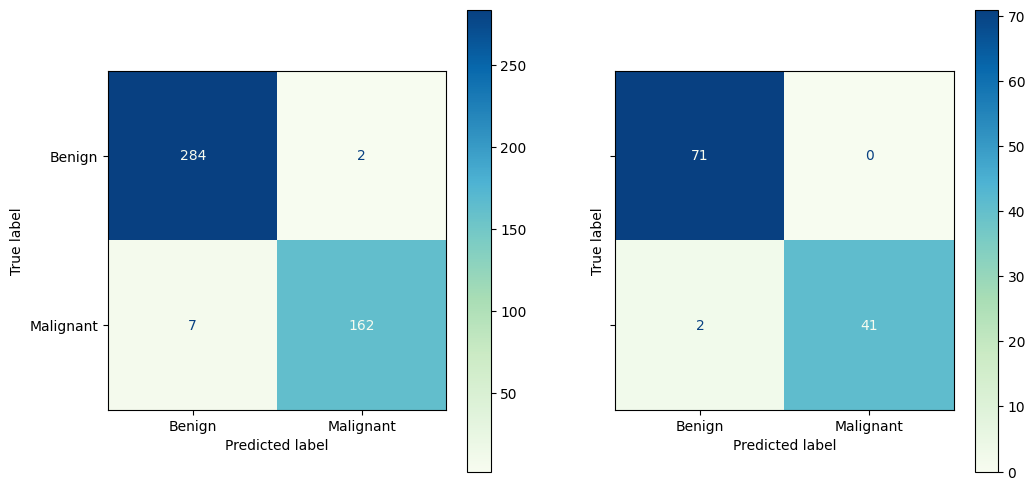

In [17]:
# Train a logistic regression model
model_LogReg_Ridge = LogisticRegression(penalty = 'l2', C = 0.1, max_iter = 10000)
model_LogReg_Ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model_LogReg_Ridge.predict(X_train_scaled)
y_pred = model_LogReg_Ridge.predict(X_test_scaled)

y_pred_prob = model_LogReg_Ridge.predict_proba(X_test_scaled)

fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, 
                                        # normalize = 'true',
                                        display_labels = ['Benign', 'Malignant'],
                                        cmap = 'GnBu',
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        # normalize = 'true',
                                        display_labels = ['Benign', 'Malignant'],
                                        cmap = 'GnBu',
                                        ax = ax[1])
plt.show()

### Assessing the model

What were our most significant features?

In [18]:
model_LogReg_Ridge.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 0.1,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 10000,
 'multi_class': 'deprecated',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 30,
 'classes_': array([0, 1]),
 'n_iter_': array([13], dtype=int32),
 'coef_': array([[ 0.37087111,  0.4192871 ,  0.35886982,  0.355747  ,  0.14327852,
         -0.01300224,  0.35494654,  0.46485547,  0.02751616, -0.1944205 ,
          0.46217896, -0.0351985 ,  0.32444403,  0.34457813,  0.06423173,
         -0.25745119, -0.05938632,  0.11795601, -0.17901571, -0.26046698,
          0.48940432,  0.60052475,  0.43407476,  0.43543002,  0.37447289,
          0.14985419,  0.40737255,  0.46444327,  0.47890389,  0.10609777]]),
 'intercept_': array([-0.63452897])}

In [19]:
coefs = model_LogReg_Ridge.coef_[0]
features = X.columns

feature_weights_df = pd.DataFrame({'features':features, 'weights':coefs, 'abs weights': np.abs(coefs)})
feature_weights_df.sort_values(by = 'abs weights', ascending=False)

,features,weights,abs weights
21,worst texture,0.600525,0.600525
20,worst radius,0.489404,0.489404
28,worst symmetry,0.478904,0.478904
7,mean concave points,0.464855,0.464855
27,worst concave points,0.464443,0.464443
10,radius error,0.462179,0.462179
23,worst area,0.435430,0.435430
22,worst perimeter,0.434075,0.434075
1,mean texture,0.419287,0.419287
26,worst concavity,0.407373,0.407373


## Another Example: Classifying Wines

In this classification problem, we are given chemical properties of wine as well as a target value corresponding to the vineyard the wine came from. Can we identify which vineyard a wine came from by analyzing the chemical content of the wine itself?

There are three categories of wine in this classification (0,1,2). Below, I've set up the problem so that you can fit a binary logistic regression or a multi-class just by toggling the comments on a few lines of code in the next cell. Everything else can stay the same; the LogisticRegression model will handle both cases.

For multi-class classification, we can leave the target variable as it is in the original data set. 

For binary classification, we will relabel the target so that:
 - 1 = *the wine is from vineyard 1* 
 - 0 = *the wine is from either vineyard 0 or 2 (not 1)*.

In [20]:
from sklearn.datasets import load_wine

wine_df, y = load_wine(return_X_y=True, as_frame=True)

# Multi-class (3) problem
wine_df['y'] = y
vineyard_labels = ['Vineyard 0', 'Vineyard 1', 'Vineyard 2']

# # Binary Classification problem
# vineyard_labels = ['Not Vineyard 1', 'Vineyard 1']
# wine_df['y'] = 1 * (y==1)

print(wine_df['y'].unique())



wine_df.head()


[0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
# Split the data into features and target

X = wine_df.drop('y', axis = 1)
y = wine_df['y']

y.unique()


array([0, 1, 2])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# I'm choosing to use logistic regression with Lasso (L1) penalty
model_Lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 2)
model_Lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model_Lasso.predict(X_train_scaled)
y_pred = model_Lasso.predict(X_test_scaled)

y_pred_prob = model_Lasso.predict_proba(X_test_scaled)


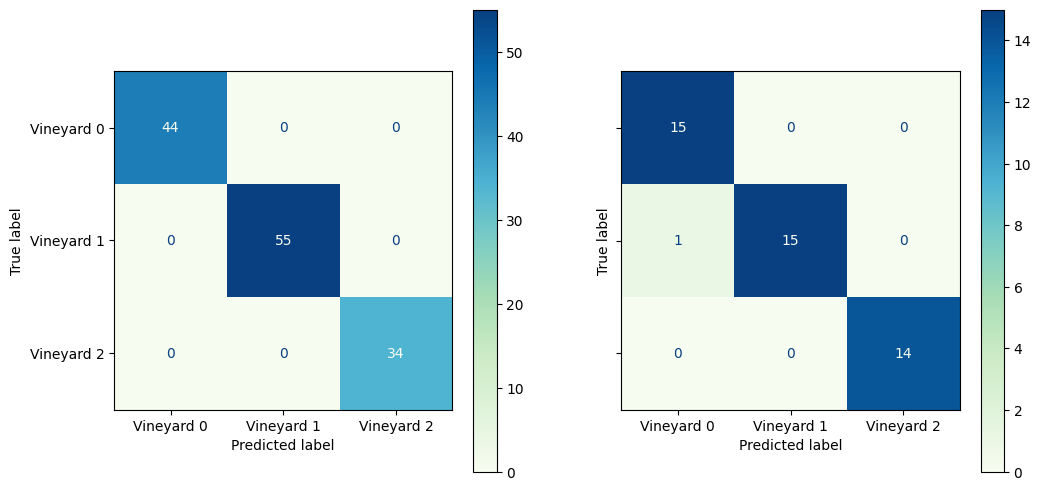

In [23]:
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, 
                                        # normalize = 'true',
                                        display_labels = vineyard_labels,
                                        cmap = 'GnBu',
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        # normalize = 'true',
                                        display_labels = vineyard_labels,
                                        cmap = 'GnBu',
                                        ax = ax[1])
plt.show()

In [24]:
coefs = model_Lasso.coef_[0]
features = X.columns

feature_weights_df = pd.DataFrame({'features':features, 'weights':coefs, 'abs weights': np.abs(coefs)})
feature_weights_df.sort_values(by = 'abs weights', ascending=False)

,features,weights,abs weights
12,proline,3.378886,3.378886
0,alcohol,1.637132,1.637132
6,flavanoids,1.425074,1.425074
11,od280/od315_of_diluted_wines,1.036857,1.036857
2,ash,0.877147,0.877147
3,alcalinity_of_ash,-0.810552,0.810552
1,malic_acid,0.588210,0.588210
8,proanthocyanins,-0.172895,0.172895
4,magnesium,0.000000,0.000000
5,total_phenols,0.000000,0.000000
